## Analisis exploratorio

- lectura de datos

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

diabetes = pd.read_csv('C:/Users/spayd/OneDrive/Documentos/UPC/practica_parcial/heart.csv', sep=',')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


- verificar si hay valores faltantes

In [139]:
diabetes = diabetes.rename(columns={'age': 'edad', 'sex': 'sexo', 'cp': 'tipo de dolor toracico', 'trestbps': 'presión arterial en reposo',
                                    'chol': 'colestoral sérico en mg/dl', 'fbs': 'Azúcar en sangre en ayunas', 'restecg': 'Resultados electrocardiográficos en reposo', 'thalach': 'frecuencia cardíaca máxima alcanzada',
                                    'exang': 'angina inducida por el ejercicio', 'oldpeak': 'depresión del ST inducida por el ejercicio en relación con el reposo', 'slope': 'la pendiente del segmento ST', 'ca': 'número de vasos principales', 'thal': 'defecto reversible', 'target': 'target'})

In [47]:
diabetes.isnull().sum()

edad                                                                    0
sexo                                                                    0
tipo de dolor toracico                                                  0
presión arterial en reposo                                              0
colestoral sérico en mg/dl                                              0
Azúcar en sangre en ayunas                                              0
Resultados electrocardiográficos en reposo                              0
frecuencia cardíaca máxima alcanzada                                    0
angina inducida por el ejercicio                                        0
depresión del ST inducida por el ejercicio en relación con el reposo    0
la pendiente del segmento ST                                            0
número de vasos principales                                             0
defecto reversible                                                      0
target                                

In [46]:
diabetes.describe()

,edad,sexo,tipo de dolor toracico,presión arterial en reposo,colestoral sérico en mg/dl,Azúcar en sangre en ayunas,Resultados electrocardiográficos en reposo,frecuencia cardíaca máxima alcanzada,angina inducida por el ejercicio,depresión del ST inducida por el ejercicio en relación con el reposo,la pendiente del segmento ST,número de vasos principales,defecto reversible,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Descripcion de los datos

In [22]:
diabetes.describe()

,edad,sexo,tipo de dolor torácico,presión arterial en reposo,colestoral sérico en mg/dl,Azúcar en sangre en ayunas,Resultados electrocardiográficos en reposo,frecuencia cardíaca máxima alcanzada,angina inducida por el ejercicio,depresión del ST inducida por el ejercicio en relación con el reposo,la pendiente del segmento ST,número de vasos principales,defecto reversible,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
cov_matrix = diabetes.cov()
cov_matrix

,edad,sexo,tipo de dolor toracico,presión arterial en reposo,colestoral sérico en mg/dl,Azúcar en sangre en ayunas,Resultados electrocardiográficos en reposo,frecuencia cardíaca máxima alcanzada,angina inducida por el ejercicio,depresión del ST inducida por el ejercicio en relación con el reposo,la pendiente del segmento ST,número de vasos principales,defecto reversible,target
edad,82.306450,-0.431198,-0.672251,43.085733,102.890625,0.392164,-0.635490,-81.446089,0.378144,2.218825,-0.947742,2.539458,0.407093,-1.040392
sexo,-0.431198,0.211944,-0.019491,-0.636863,-4.708984,0.004465,-0.013395,-0.522838,0.030288,0.045812,-0.007584,0.053021,0.056697,-0.064346
tipo de dolor toracico,-0.672251,-0.019491,1.060160,0.688565,-4.336914,0.029108,0.023687,7.268296,-0.195451,-0.211407,0.083727,-0.187017,-0.104385,0.223903
presión arterial en reposo,43.085733,-0.636863,0.688565,306.835410,115.657227,1.135165,-1.144685,-15.822822,0.506798,3.857971,-1.303344,1.887842,0.644446,-1.215584
colestoral sérico en mg/dl,102.890625,-4.708984,-4.336914,115.657227,2661.787109,0.495117,-4.014648,-25.841797,1.643555,3.933301,-0.454102,3.949219,3.209961,-2.579102
Azúcar en sangre en ayunas,0.392164,0.004465,0.029108,1.135165,0.495117,0.127111,-0.019583,-0.072719,0.008303,0.004549,-0.013634,0.050406,-0.009333,-0.007339
Resultados electrocardiográficos en reposo,-0.635490,-0.013395,0.023687,-1.144685,-4.014648,-0.019583,0.278655,0.587909,-0.016373,-0.031085,0.028073,-0.042482,-0.006718,0.035496
frecuencia cardíaca máxima alcanzada,-81.446089,-0.522838,7.268296,-15.822822,-25.841797,-0.072719,0.587909,529.263325,-4.136114,-9.456022,5.618078,-4.929917,-1.400290,4.865194
angina inducida por el ejercicio,0.378144,0.030288,-0.195451,0.506798,1.643555,0.008303,-0.016373,-4.136114,0.223514,0.172684,-0.078077,0.052558,0.057865,-0.103558
depresión del ST inducida por el ejercicio en relación con el reposo,2.218825,0.045812,-0.211407,3.857971,3.933301,0.004549,-0.031085,-9.456022,0.172684,1.380750,-0.417527,0.268673,0.147810,-0.257632


- correcion la de pearson

![](https://github.com/Godiex/bosting_house/raw/main/correlacion.png)


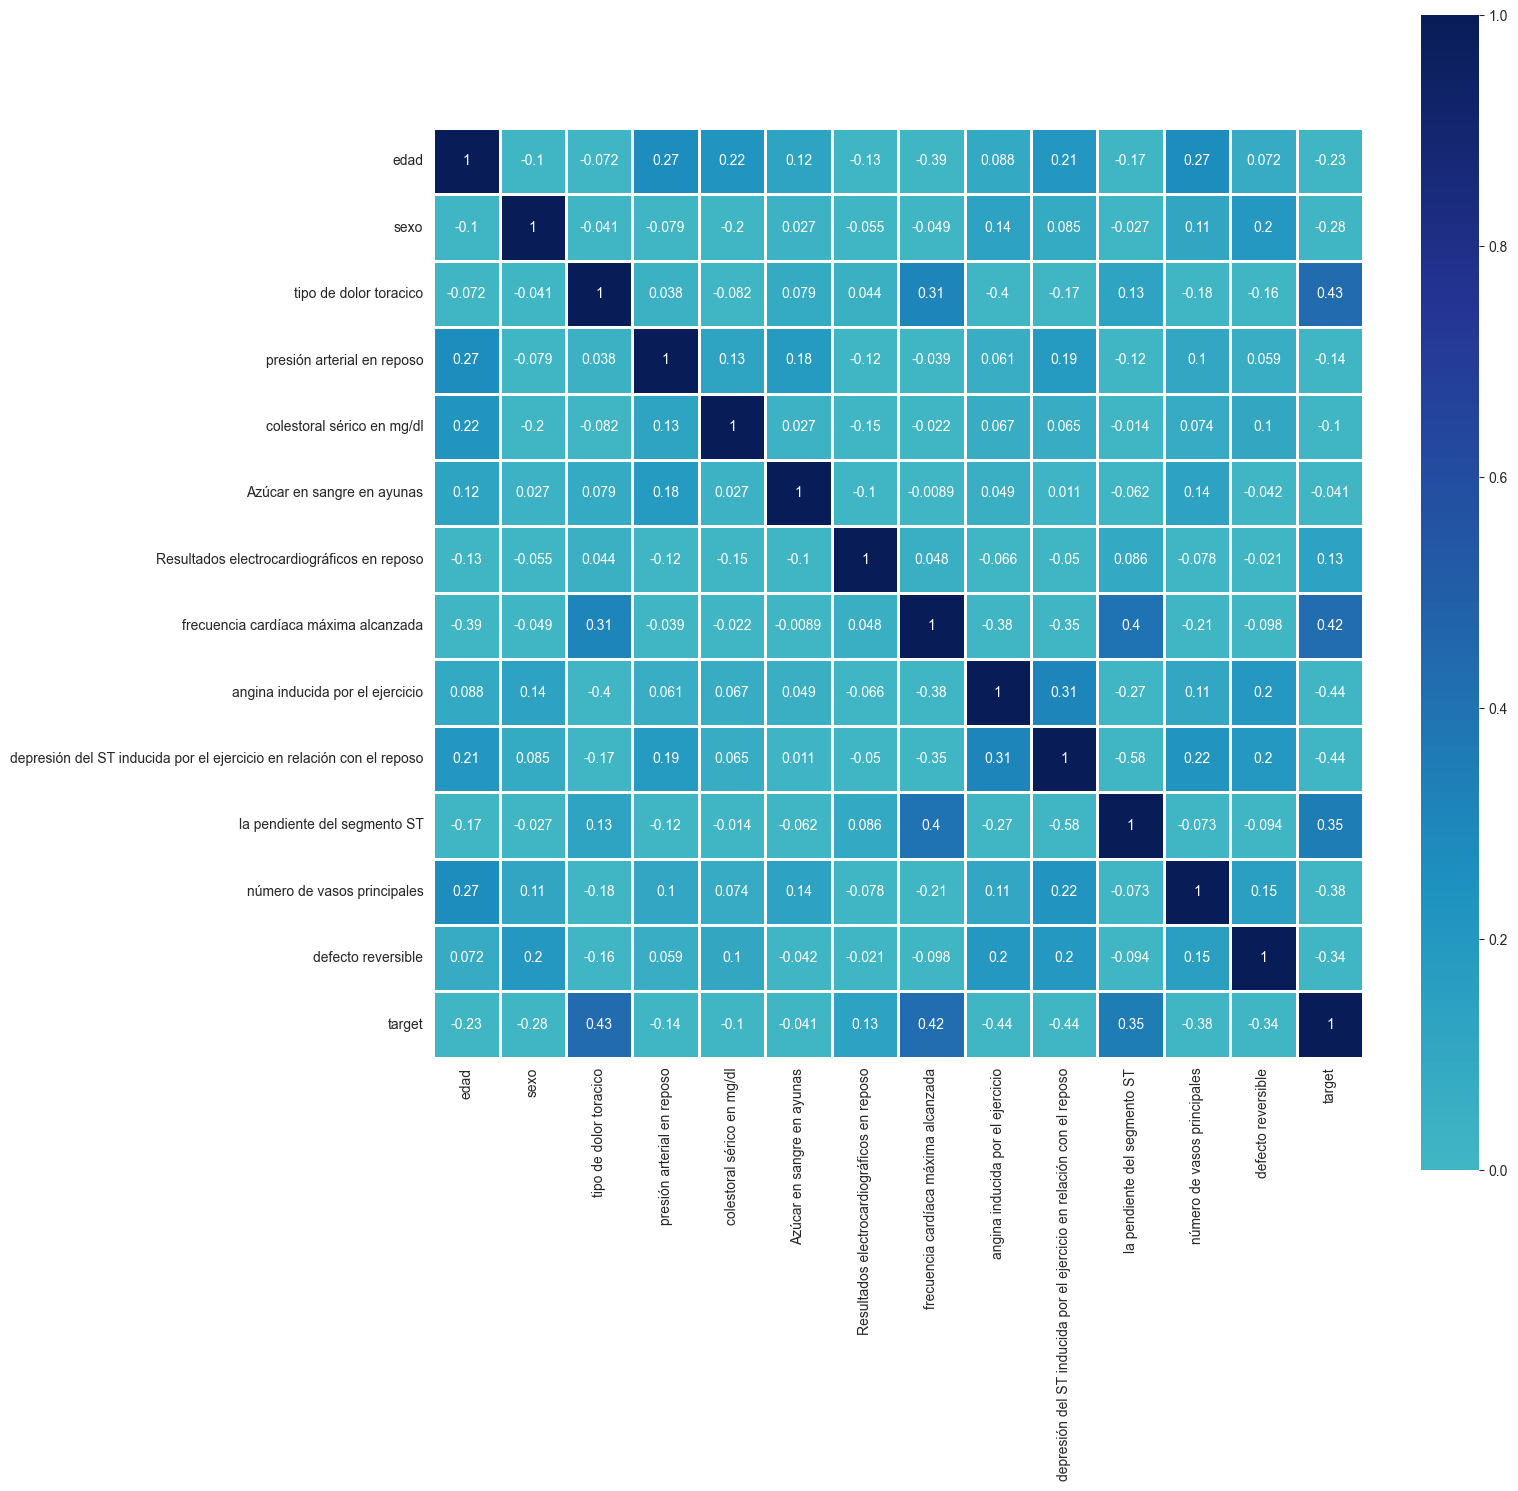

In [118]:

plt.figure(figsize=(15,15))
sns.heatmap(diabetes.corr(), vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)
plt.savefig("person.png")

- Deteccion de datos atipicos

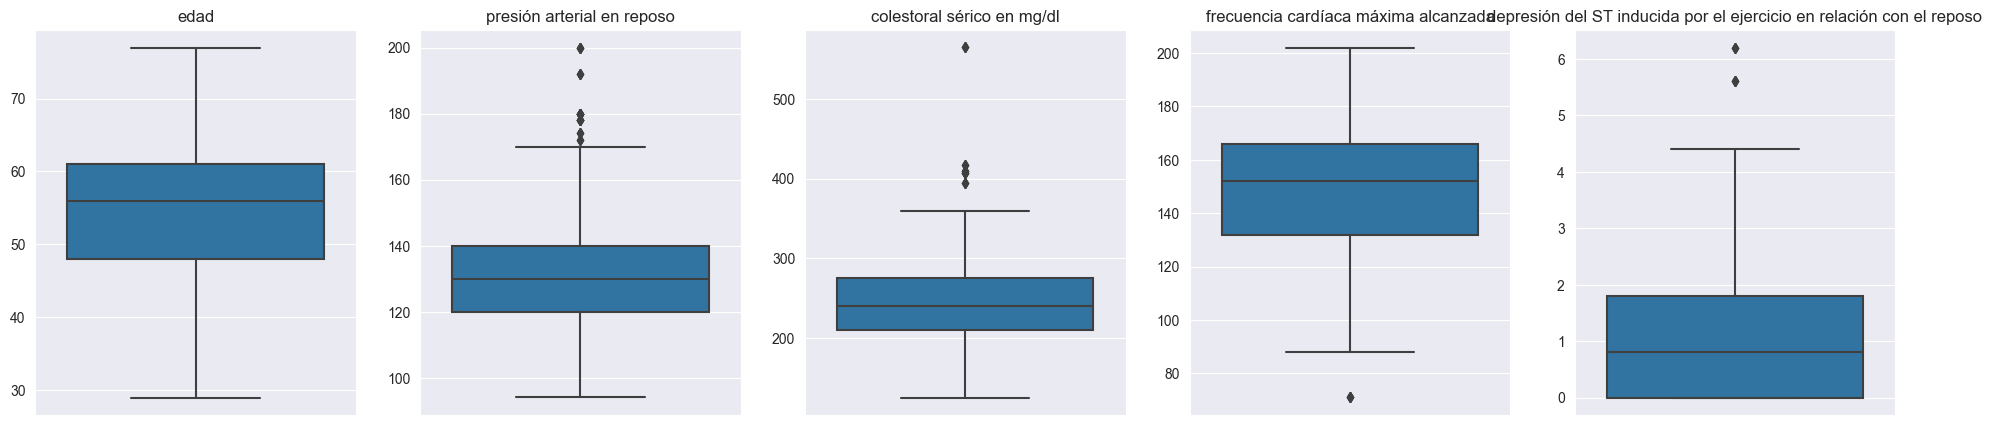

In [27]:
num = ['edad', 'presión arterial en reposo', 'colestoral sérico en mg/dl', 'frecuencia cardíaca máxima alcanzada', 'depresión del ST inducida por el ejercicio en relación con el reposo']
plt.figure(figsize=(24,5))
for idx, feature in enumerate(num):
  plt.subplot(1,len(num),idx+1)
  sns.boxplot(data = diabetes, y = feature).set(ylabel = None, title = feature)
  plt.savefig("cajas.png")

- Dividir los datos en subconjuntos de entrenamiento y prueba:


-

In [35]:
import plotly.express as px
labels=["Saludable","Con problemas cardiacos"]

healthy_or_not = diabetes['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=diabetes['target'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["blue","dark blue"]
             ,title="Saludable vs Con problemas cardiacos")
fig.show()


- Sexo vs Target

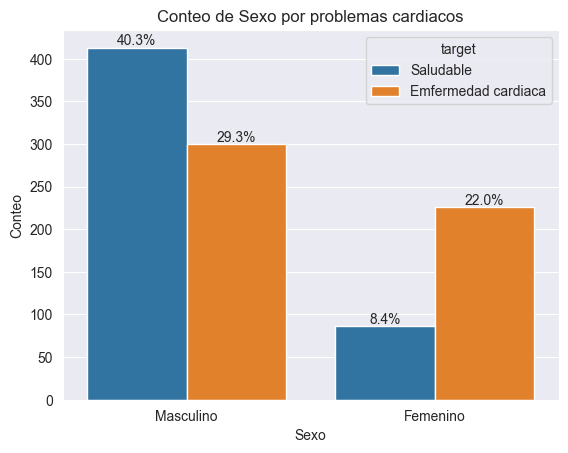

In [137]:
diabetes['sexo_cat'] = diabetes['sexo'].apply(lambda sexo: "Masculino" if sexo == 1 else "Femenino")
diabetes['target'] = diabetes['target'].apply(lambda target: "Emfermedad cardiaca" if target == 1 else "Saludable")

ax = sns.countplot(data=diabetes, x="sexo_cat", hue="target")
total = len(diabetes['sexo'])
for p in ax.patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            percentage,
            ha="center")
ax.set(xlabel='Sexo', ylabel='Conteo', title='Conteo de Sexo por problemas cardiacos')
plt.savefig("sex.png")

- chol vs target

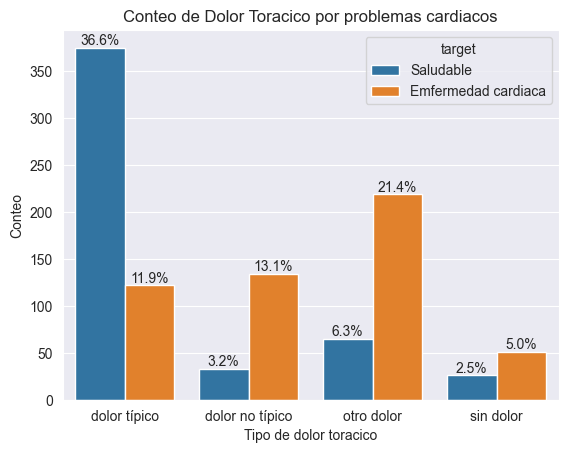

In [132]:
cp_dict = {0: 'dolor típico',
           1: 'dolor no típico',
           2: 'otro dolor',
           3: 'sin dolor'}
diabetes['cat_cp'] = diabetes['tipo de dolor toracico'].replace(cp_dict)
diabetes['target'] = diabetes['target'].apply(lambda target: "Emfermedad cardiaca" if target == 1 else "Saludable")

ax = sns.countplot(data=diabetes, x="cat_cp", hue="target")
total = len(diabetes['cat_cp'])
for p in ax.patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            percentage,
            ha="center")
ax.set(xlabel='Tipo de dolor toracico', ylabel='Conteo', title='Conteo de Dolor Toracico por problemas cardiacos')
plt.savefig("chol.png")

- Target vs fbs

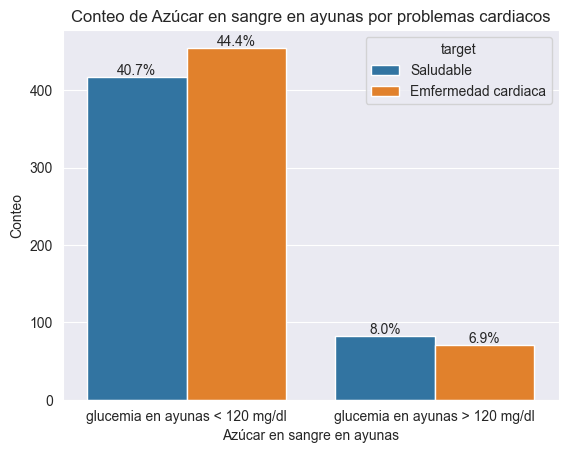

In [128]:
fbs_dict = {0: 'glucemia en ayunas < 120 mg/dl',
            1: 'glucemia en ayunas > 120 mg/dl'}
diabetes['cat_fbs'] = diabetes['Azúcar en sangre en ayunas'].replace(fbs_dict)
diabetes['target'] = diabetes['target'].apply(lambda target: "Emfermedad cardiaca" if target == 1 else "Saludable")

ax = sns.countplot(data=diabetes, x="cat_fbs", hue="target")
total = len(diabetes['cat_fbs'])
for p in ax.patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            percentage,
            ha="center")
ax.set(xlabel='Azúcar en sangre en ayunas', ylabel='Conteo', title='Conteo de Azúcar en sangre en ayunas por problemas cardiacos')
plt.savefig("fbs.png")

- target vs restecg

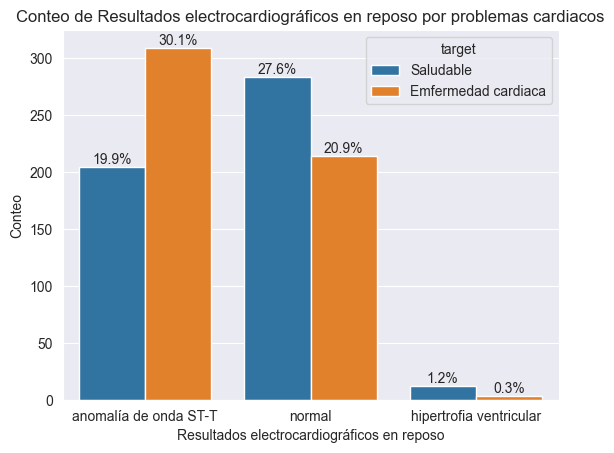

In [124]:
restecg_dict = {0: 'normal',
                1: 'anomalía de onda ST-T',
                2: 'hipertrofia ventricular'}
diabetes['cat_restecg'] = diabetes['Resultados electrocardiográficos en reposo'].replace(restecg_dict)
diabetes['target'] = diabetes['target'].apply(lambda target: "Emfermedad cardiaca" if target == 1 else "Saludable")

ax = sns.countplot(data=diabetes, x="cat_restecg", hue="target")
total = len(diabetes['cat_restecg'])
for p in ax.patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            percentage,
            ha="center")
ax.set(xlabel='Resultados electrocardiográficos en reposo', ylabel='Conteo', title='Conteo de Resultados electrocardiográficos en reposo por problemas cardiacos')
plt.savefig("restecg.png")

- target vs ca

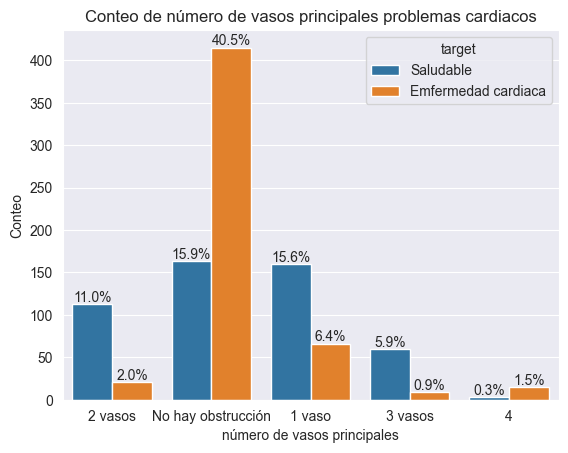

In [119]:
ca_dict = {0: 'No hay obstrucción',
           1: '1 vaso',
           2: '2 vasos',
           3: '3 vasos'}
diabetes['cat_ca'] = diabetes['número de vasos principales'].replace(ca_dict)
diabetes['target'] = diabetes['target'].apply(lambda target: "Emfermedad cardiaca" if target == 1 else "Saludable")

ax = sns.countplot(data=diabetes, x="cat_ca", hue="target")
total = len(diabetes['cat_ca'])
for p in ax.patches:
    height = p.get_height()
    percentage = f"{100 * height / total:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            percentage,
            ha="center")
ax.set(xlabel='número de vasos principales', ylabel='Conteo', title='Conteo de número de vasos principales problemas cardiacos')
plt.savefig("ca.png")

In [140]:
# normalizacion de los datos
x = diabetes.drop(['target'], axis=1)
y = diabetes['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn import preprocessing

scaler =preprocessing.RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

- Validar x_train y x_test

In [141]:
x_train.shape, x_test.shape

((717, 13), (308, 13))

In [142]:
logreg = LogisticRegression()

#Ahora entrenamos el modelo
logreg.fit(x_train, y_train)

#Creamos la variable predictiva
y_pred = logreg.predict(x_test)

#Calculamos el valor de preccion del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística", accuracy)

Precisión del modelo de regresión logística 0.8116883116883117


- Realizar la predicción con los datos de prueba:

In [143]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = logreg.predict(x_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       159
           1       0.77      0.88      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308



- Comparar los resultados de la predicción con los valores reales:

In [1]:
diabetes['target'].replace('0', 'Problemas cardiacos', inplace=True)
sns.countplot(data=diabetes, x="sexo", hue="target")

NameError: name 'diabetes' is not defined

Accuracy: 0.8116883116883117
Recall: 0.8791946308724832
[[119  40]
 [ 18 131]]


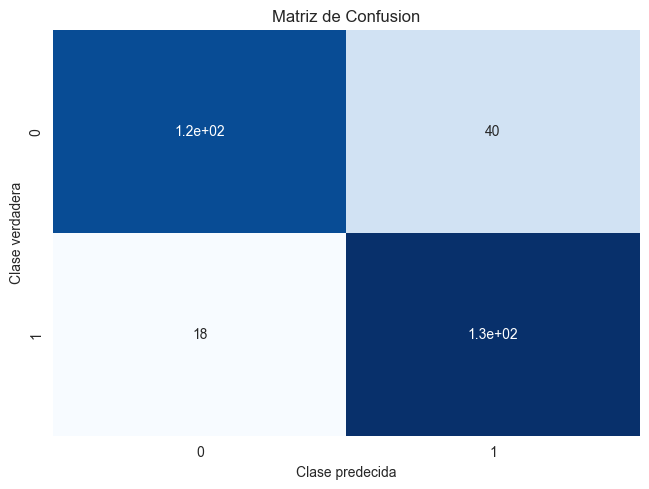

<Figure size 640x480 with 0 Axes>

In [144]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
matriz_confucion = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2, suppress=True)
print(matriz_confucion)
sns.heatmap(matriz_confucion, annot=True, cbar=None, cmap="Blues")
plt.title("Matriz de Confusion"), plt.tight_layout()
plt.ylabel("Clase verdadera"), plt.xlabel("Clase predecida")
plt.show()
plt.savefig("conf.png")